In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [64]:
df = pd.read_csv('adjusted_smart_scheduler_dataset.csv')

In [65]:
df.head()

,Available Slot Start,Task Type,Duration (hrs),Priority,Available Slot End
0,2023-01-01 08:00:00,Meeting,1.5,Medium,2023-01-01 09:30:00
1,2023-01-01 09:00:00,Social,3.0,Medium,2023-01-01 12:00:00
2,2023-01-01 10:00:00,Deep Work,1.5,Medium,2023-01-01 11:30:00
3,2023-01-01 11:00:00,Exercise,0.5,Medium,2023-01-01 11:30:00
4,2023-01-01 12:00:00,Social,2.0,Low,2023-01-01 14:00:00


In [66]:
label_encoders = {}
for column in ['Task Type','Priority']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [67]:
df.head()

,Available Slot Start,Task Type,Duration (hrs),Priority,Available Slot End
0,2023-01-01 08:00:00,3,1.5,2,2023-01-01 09:30:00
1,2023-01-01 09:00:00,4,3.0,2,2023-01-01 12:00:00
2,2023-01-01 10:00:00,0,1.5,2,2023-01-01 11:30:00
3,2023-01-01 11:00:00,2,0.5,2,2023-01-01 11:30:00
4,2023-01-01 12:00:00,4,2.0,1,2023-01-01 14:00:00


In [69]:
df['Slot Start Hour'] = pd.to_datetime(df['Available Slot Start']).dt.hour
df['Slot End Hour'] = pd.to_datetime(df['Available Slot End']).dt.hour

In [70]:
X = df.drop(['Available Slot Start', 'Available Slot End', 'Priority'], axis=1)
y = df['Priority']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [71]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
y_pred = clf.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Acuuracy: {accuracy*100:.2f}%")

Model Acuuracy: 32.50%


In [74]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for training set')

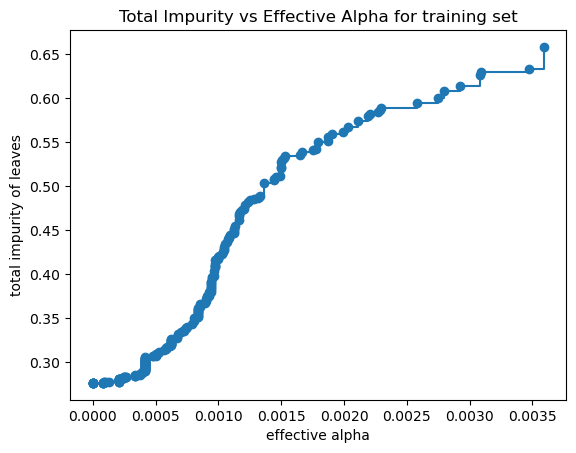

In [75]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o',drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

In [76]:
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

In [78]:
clf = DecisionTreeClassifier(random_state=42,ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Acuuracy: {accuracy*100:.2f}%")

Model Acuuracy: 33.50%


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Example feature engineering: Convert 'Scheduled Time' to numerical format
large_df = pd.read_csv('adjusted_smart_scheduler_dataset.csv')
large_df['Scheduled Hour'] = pd.to_datetime(large_df['Scheduled Time'], format='%I:%M %p').dt.hour

# Assume X and y are defined (X includes the new 'Scheduled Hour' feature)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define a grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

KeyError: 'Scheduled Time'

In [80]:
lr_model = LogisticRegression().fit(X_train,y_train)

y_pred = lr_model.predict(X_test)
print(y_pred)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

print('Confusion Matrix: \n' + str(confusion_matrix(y_test, y_pred)))



[0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1]
Accuracy Score: 0.32
Confusion Matrix: 
[[28 31  0]
 [30 36  0]
 [33 42  0]]


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [83]:
df = pd.read_csv('adjusted_smart_scheduler_dataset.csv')

In [84]:
label_encoders = {}
for column in ['Task Type','Priority']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [85]:
df['Slot Start Hour'] = pd.to_datetime(df['Available Slot Start']).dt.hour
df['Slot End Hour'] = pd.to_datetime(df['Available Slot End']).dt.hour

In [86]:
X = df.drop(['Available Slot Start', 'Available Slot End','Priority'],axis=1)
y = df['Priority']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred = clf.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.335


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [92]:
df = pd.read_csv('adjusted_smart_scheduler_dataset.csv')

In [93]:
df['Is Weekend'] = pd.to_datetime(df['Available Slot Start']).dt.dayofweek >= 5

In [94]:
df.head()

,Available Slot Start,Task Type,Duration (hrs),Priority,Available Slot End,Is Weekend
0,2023-01-01 08:00:00,Meeting,1.5,Medium,2023-01-01 09:30:00,True
1,2023-01-01 09:00:00,Social,3.0,Medium,2023-01-01 12:00:00,True
2,2023-01-01 10:00:00,Deep Work,1.5,Medium,2023-01-01 11:30:00,True
3,2023-01-01 11:00:00,Exercise,0.5,Medium,2023-01-01 11:30:00,True
4,2023-01-01 12:00:00,Social,2.0,Low,2023-01-01 14:00:00,True


In [95]:
label_encoders = {}
for column in ['Task Type', 'Priority']:
    if df[column].dtype == object:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [96]:
X = df.drop('Priority',axis=1)
y = df['Priority']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [99]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: '2023-01-02 13:00:00'

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the CSV file
df = pd.read_csv('preprocessed_smart_scheduler_dataset.csv')

# Convert categorical variables to numeric using LabelEncoder
label_encoders = {}
for column in ['Task Type', 'Priority']:
    if df[column].dtype == object:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Assuming 'Priority' is the target variable and the rest are features
X = df.drop('Priority', axis=1)
y = df['Priority']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 34.50%


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [103]:
df = pd.read_csv('first_adjusted_smart_scheduler_dataset.csv')

In [104]:
label_encoders = {}
for column in ['Task Type','Priority']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [105]:
df['Slot Start Hour'] = pd.to_datetime(df['Available Slot Start']).dt.hour
df['Slot End Hour'] = pd.to_datetime(df['Available Slot End']).dt.hour

In [106]:
df.head()

,Available Slot Start,Task Type,Duration (hrs),Priority,Available Slot End,Slot Start Hour,Slot End Hour
0,2023-01-07 15:00:00,0,1.5,2,2023-01-07 16:30:00,15,16
1,2023-01-20 12:00:00,2,3.0,2,2023-01-20 15:00:00,12,15
2,2023-01-29 17:00:00,3,1.5,0,2023-01-29 18:30:00,17,18
3,2023-01-15 17:00:00,2,3.0,1,2023-01-15 20:00:00,17,20
4,2023-01-11 07:00:00,4,1.5,1,2023-01-11 08:30:00,7,8


In [107]:
X = df.drop(['Available Slot Start', 'Available Slot End', 'Priority'], axis=1)
y = df['Priority']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
clf = DecisionTreeClassifier()

In [110]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.305
